## Try 1 : No Regularisation ( ie no dropout or augmentation)

Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3           [-1, 12, 28, 28]             876
       BatchNorm2d-4           [-1, 12, 28, 28]              24
         MaxPool2d-5           [-1, 12, 14, 14]               0
            Conv2d-6           [-1, 14, 14, 14]           1,526
       BatchNorm2d-7           [-1, 14, 14, 14]              28
            Conv2d-8           [-1, 16, 14, 14]           2,032
       BatchNorm2d-9           [-1, 16, 14, 14]              32
        MaxPool2d-10             [-1, 16, 7, 7]               0
           Conv2d-11             [-1, 20, 5, 5]           2,900
      BatchNorm2d-12             [-1, 20, 5, 5]              40
           Conv2d-13             [-1, 24, 3, 3]           4,344
      BatchNorm2d-14

Epoch 1: Loss=0.120114 Batch_id=390 Accuracy=96.34%: 100%|██████████| 391/391 [00:13<00:00, 29.40it/s]



Validation set: Average loss: 0.0722, Accuracy: 9776/10000 (97.76%)

Epoch 2, Learning Rate: 0.100000


Epoch 2: Loss=0.055325 Batch_id=390 Accuracy=98.75%: 100%|██████████| 391/391 [00:11<00:00, 34.70it/s]



Validation set: Average loss: 0.0361, Accuracy: 9888/10000 (98.88%)

Epoch 3, Learning Rate: 0.100000


Epoch 3: Loss=0.003193 Batch_id=390 Accuracy=99.10%: 100%|██████████| 391/391 [00:11<00:00, 34.42it/s]



Validation set: Average loss: 0.0342, Accuracy: 9897/10000 (98.97%)

Epoch 4, Learning Rate: 0.100000


Epoch 4: Loss=0.039070 Batch_id=390 Accuracy=99.20%: 100%|██████████| 391/391 [00:11<00:00, 34.79it/s]



Validation set: Average loss: 0.0313, Accuracy: 9902/10000 (99.02%)

Epoch 5, Learning Rate: 0.100000


Epoch 5: Loss=0.027712 Batch_id=390 Accuracy=99.35%: 100%|██████████| 391/391 [00:11<00:00, 34.35it/s]



Validation set: Average loss: 0.0374, Accuracy: 9879/10000 (98.79%)

Epoch 6, Learning Rate: 0.100000


Epoch 6: Loss=0.025423 Batch_id=390 Accuracy=99.42%: 100%|██████████| 391/391 [00:11<00:00, 34.46it/s]



Validation set: Average loss: 0.0315, Accuracy: 9902/10000 (99.02%)

Epoch 7, Learning Rate: 0.010000


Epoch 7: Loss=0.007183 Batch_id=390 Accuracy=99.77%: 100%|██████████| 391/391 [00:11<00:00, 34.20it/s]



Validation set: Average loss: 0.0222, Accuracy: 9937/10000 (99.37%)

Epoch 8, Learning Rate: 0.010000


Epoch 8: Loss=0.015771 Batch_id=390 Accuracy=99.85%: 100%|██████████| 391/391 [00:11<00:00, 34.04it/s]



Validation set: Average loss: 0.0214, Accuracy: 9941/10000 (99.41%)

🎉 Target accuracy of 99.4% achieved in epoch 8!

✅ Training completed!
📊 Best validation accuracy: 99.41%
🔢 Total parameters used: 14,116


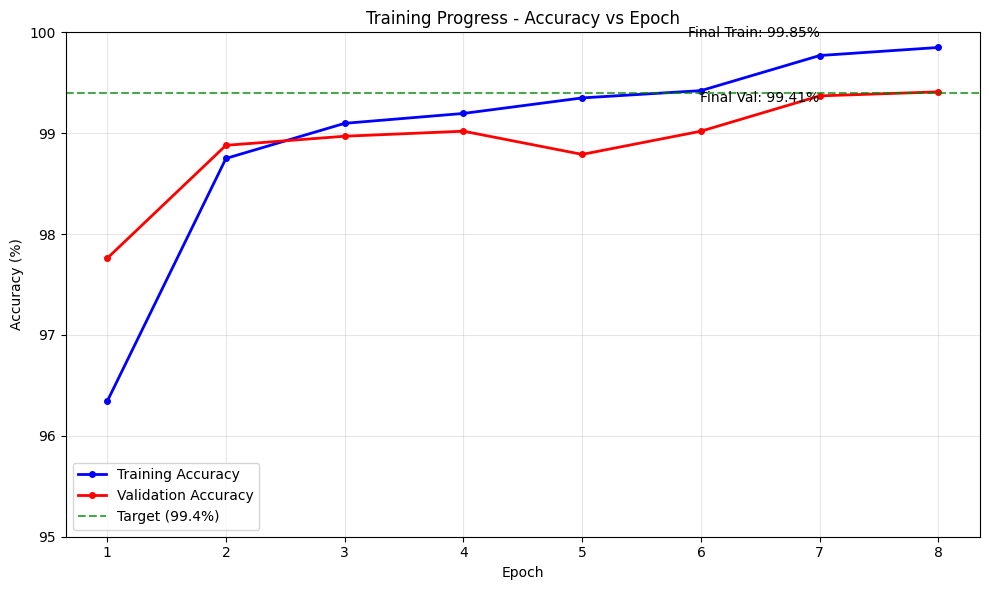

In [22]:
# -*- coding: utf-8 -*-
"""Clean MNIST CNN - 99.4% accuracy with <15k parameters
Simple, effective architecture with healthy training pattern
"""

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

class CleanNet(nn.Module):
    def __init__(self):
        super(CleanNet, self).__init__()

        # Block 1: Initial feature extraction
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)      # 28x28x1 -> 28x28x8, RF: 3x3
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 = nn.Conv2d(8, 12, 3, padding=1)     # 28x28x8 -> 28x28x12, RF: 5x5
        self.bn2 = nn.BatchNorm2d(12)
        self.pool1 = nn.MaxPool2d(2, 2)                 # 28x28x12 -> 14x14x12
        # self.dropout1 = nn.Dropout(0.02)               # Removed dropout

        # Block 2: Mid-level features
        self.conv3 = nn.Conv2d(12, 14, 3, padding=1)    # 14x14x12 -> 14x14x14, RF: 10x10
        self.bn3 = nn.BatchNorm2d(14)

        self.conv4 = nn.Conv2d(14, 16, 3, padding=1)    # 14x14x14 -> 14x14x16, RF: 14x14
        self.bn4 = nn.BatchNorm2d(16)
        self.pool2 = nn.MaxPool2d(2, 2)                 # 14x14x16 -> 7x7x16
        # self.dropout2 = nn.Dropout(0.02)               # Removed dropout

        # Block 3: High-level features
        self.conv5 = nn.Conv2d(16, 20, 3)               # 7x7x16 -> 5x5x20, RF: 20x20
        self.bn5 = nn.BatchNorm2d(20)

        self.conv6 = nn.Conv2d(20, 24, 3)               # 5x5x20 -> 3x3x24, RF: 24x24
        self.bn6 = nn.BatchNorm2d(24)

        # Output block with Global Average Pooling
        self.conv7 = nn.Conv2d(24, 10, 3)               # 3x3x24 -> 1x1x10, RF: 28x28
        self.gap = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        # Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        # Block 3
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))

        # Output
        x = self.conv7(x)
        x = self.gap(x)
        x = x.view(-1, 10)

        return F.log_softmax(x, dim=1)

# Setup
try:
    from torchsummary import summary
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torchsummary"])
    from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Using device: {device}")

# Create and analyze model
model = CleanNet().to(device)
summary(model, input_size=(1, 28, 28))

total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal Parameters: {total_params:,}")

# Data preparation - lighter augmentation for healthy train/test balance
torch.manual_seed(42)
batch_size = 128

# No data augmentation - clean training for maximum performance
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Data preparation with 50k/10k split as specified
torch.manual_seed(42)
batch_size = 128

# Load full training dataset
full_train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform_train)

# Create 50k/10k split from the 60k training data
train_size = 50000
val_size = 10000

train_dataset, val_dataset = torch.utils.data.random_split(
    full_train_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

# Update validation dataset transform to use test transform
val_dataset.dataset = datasets.MNIST('../data', train=True, download=False, transform=transform_test)
val_indices = val_dataset.indices

# Create a proper validation dataset
val_dataset = torch.utils.data.Subset(
    datasets.MNIST('../data', train=True, download=False, transform=transform_test),
    val_indices
)

kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

# This is now our validation set (what we call "test" in the assignment)
test_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

print(f"Dataset split: {len(train_dataset)} train, {len(val_dataset)} validation")

# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)

        pbar.set_description(desc=f'Epoch {epoch}: Loss={loss.item():.6f} Batch_id={batch_idx} Accuracy={100*correct/processed:.2f}%')

    return 100. * correct / processed

# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nValidation set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({test_accuracy:.2f}%)')
    return test_accuracy

# Initialize model, optimizer and simple scheduler
model = CleanNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

# Simple StepLR - drops learning rate at epoch 6
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

# Training loop
print("Starting training...")
best_accuracy = 0
target_accuracy = 99.4

# Training loop with metrics collection
print("Starting training...")
best_accuracy = 0
target_accuracy = 99.4
train_accuracies = []
val_accuracies = []
train_losses = []

for epoch in range(1, 16):
    current_lr = optimizer.param_groups[0]['lr']
    print(f"\nEpoch {epoch}, Learning Rate: {current_lr:.6f}")

    train_acc = train(model, device, train_loader, optimizer, epoch)
    val_acc = test(model, device, test_loader)

    # Store metrics for plotting
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    scheduler.step()

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), 'best_clean_model.pth')

    if val_acc >= target_accuracy:
        print(f"\n🎉 Target accuracy of {target_accuracy}% achieved in epoch {epoch}!")
        break

print(f"\n✅ Training completed!")
print(f"📊 Best validation accuracy: {best_accuracy:.2f}%")
print(f"🔢 Total parameters used: {total_params:,}")

# Plot training progress
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    epochs_range = range(1, len(train_accuracies) + 1)

    plt.plot(epochs_range, train_accuracies, 'b-o', label='Training Accuracy', linewidth=2, markersize=4)
    plt.plot(epochs_range, val_accuracies, 'r-o', label='Validation Accuracy', linewidth=2, markersize=4)
    plt.axhline(y=target_accuracy, color='g', linestyle='--', alpha=0.7, label=f'Target ({target_accuracy}%)')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Progress - Accuracy vs Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(95, 100)

    # Add final accuracy annotations
    plt.annotate(f'Final Train: {train_accuracies[-1]:.2f}%',
                xy=(len(train_accuracies), train_accuracies[-1]),
                xytext=(len(train_accuracies)-1, train_accuracies[-1]+0.1),
                fontsize=10, ha='right')
    plt.annotate(f'Final Val: {val_accuracies[-1]:.2f}%',
                xy=(len(val_accuracies), val_accuracies[-1]),
                xytext=(len(val_accuracies)-1, val_accuracies[-1]-0.1),
                fontsize=10, ha='right')

    plt.tight_layout()
    plt.show()

except ImportError:
    print("Matplotlib not available for plotting")
    for i, (train_acc, val_acc) in enumerate(zip(train_accuracies, val_accuracies), 1):
        print(f"Epoch {i}: Train={train_acc:.2f}%, Val={val_acc:.2f}%")

## Try 2 : With Regularisation

Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3           [-1, 14, 28, 28]           1,022
       BatchNorm2d-4           [-1, 14, 28, 28]              28
         MaxPool2d-5           [-1, 14, 14, 14]               0
           Dropout-6           [-1, 14, 14, 14]               0
            Conv2d-7           [-1, 16, 14, 14]           2,032
       BatchNorm2d-8           [-1, 16, 14, 14]              32
            Conv2d-9           [-1, 20, 14, 14]           2,900
      BatchNorm2d-10           [-1, 20, 14, 14]              40
        MaxPool2d-11             [-1, 20, 7, 7]               0
          Dropout-12             [-1, 20, 7, 7]               0
           Conv2d-13             [-1, 24, 5, 5]           4,344
      BatchNorm2d-14

Epoch 1: Loss=0.080279 Batch_id=390 Accuracy=96.04%: 100%|██████████| 391/391 [00:15<00:00, 25.96it/s]



Validation set: Average loss: 0.0600, Accuracy: 9807/10000 (98.07%)

Epoch 2, Learning Rate: 0.100000


Epoch 2: Loss=0.058485 Batch_id=390 Accuracy=98.62%: 100%|██████████| 391/391 [00:14<00:00, 26.53it/s]



Validation set: Average loss: 0.0408, Accuracy: 9874/10000 (98.74%)

Epoch 3, Learning Rate: 0.100000


Epoch 3: Loss=0.002584 Batch_id=390 Accuracy=98.92%: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]



Validation set: Average loss: 0.0472, Accuracy: 9844/10000 (98.44%)

Epoch 4, Learning Rate: 0.100000


Epoch 4: Loss=0.002478 Batch_id=390 Accuracy=99.04%: 100%|██████████| 391/391 [00:15<00:00, 26.02it/s]



Validation set: Average loss: 0.0315, Accuracy: 9891/10000 (98.91%)

Epoch 5, Learning Rate: 0.100000


Epoch 5: Loss=0.033928 Batch_id=390 Accuracy=99.18%: 100%|██████████| 391/391 [00:14<00:00, 27.15it/s]



Validation set: Average loss: 0.0300, Accuracy: 9907/10000 (99.07%)

Epoch 6, Learning Rate: 0.100000


Epoch 6: Loss=0.006727 Batch_id=390 Accuracy=99.27%: 100%|██████████| 391/391 [00:14<00:00, 27.18it/s]



Validation set: Average loss: 0.0362, Accuracy: 9882/10000 (98.82%)

Epoch 7, Learning Rate: 0.010000


Epoch 7: Loss=0.007413 Batch_id=390 Accuracy=99.55%: 100%|██████████| 391/391 [00:14<00:00, 27.18it/s]



Validation set: Average loss: 0.0211, Accuracy: 9931/10000 (99.31%)

Epoch 8, Learning Rate: 0.010000


Epoch 8: Loss=0.021519 Batch_id=390 Accuracy=99.67%: 100%|██████████| 391/391 [00:14<00:00, 27.02it/s]



Validation set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Epoch 9, Learning Rate: 0.010000


Epoch 9: Loss=0.009189 Batch_id=390 Accuracy=99.70%: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s]



Validation set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Epoch 10, Learning Rate: 0.010000


Epoch 10: Loss=0.002600 Batch_id=390 Accuracy=99.72%: 100%|██████████| 391/391 [00:14<00:00, 27.19it/s]



Validation set: Average loss: 0.0198, Accuracy: 9936/10000 (99.36%)

Epoch 11, Learning Rate: 0.010000


Epoch 11: Loss=0.005749 Batch_id=390 Accuracy=99.74%: 100%|██████████| 391/391 [00:15<00:00, 25.62it/s]



Validation set: Average loss: 0.0195, Accuracy: 9938/10000 (99.38%)

Epoch 12, Learning Rate: 0.010000


Epoch 12: Loss=0.000897 Batch_id=390 Accuracy=99.74%: 100%|██████████| 391/391 [00:14<00:00, 27.13it/s]



Validation set: Average loss: 0.0194, Accuracy: 9940/10000 (99.40%)

🎉 Target accuracy of 99.4% achieved in epoch 12!

✅ Training completed!
📊 Best validation accuracy: 99.40%
🔢 Total parameters used: 19,204


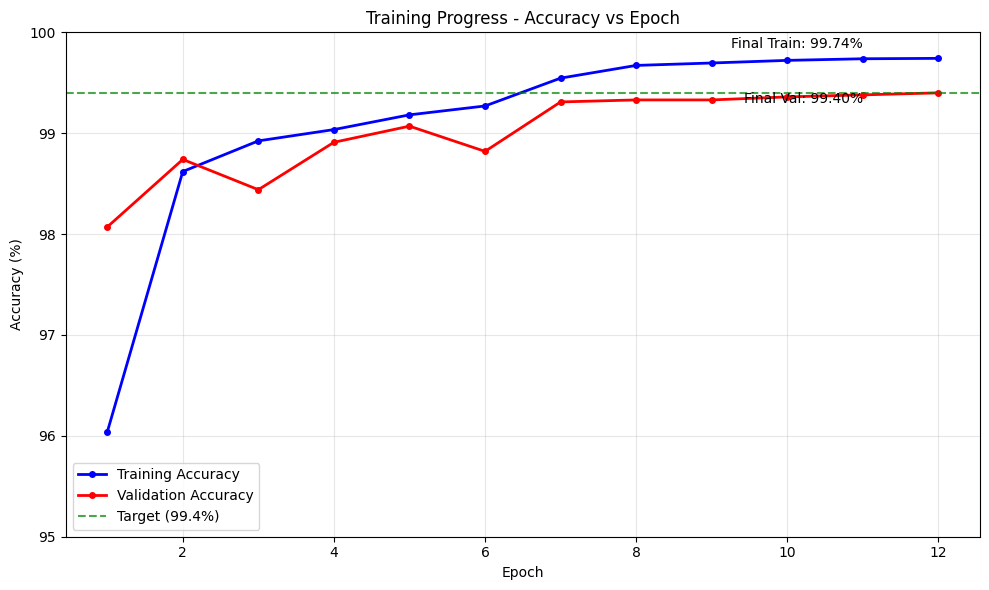

In [24]:
# -*- coding: utf-8 -*-
"""Clean MNIST CNN - 99.4% accuracy with <15k parameters
Simple, effective architecture with healthy training pattern
"""

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm

class CleanNet(nn.Module):
    def __init__(self):
        super(CleanNet, self).__init__()

        # Block 1: Initial feature extraction
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)      # 28x28x1 -> 28x28x8, RF: 3x3
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 = nn.Conv2d(8, 14, 3, padding=1)     # 28x28x8 -> 28x28x14, RF: 5x5
        self.bn2 = nn.BatchNorm2d(14)
        self.pool1 = nn.MaxPool2d(2, 2)                 # 28x28x14 -> 14x14x14
        self.dropout1 = nn.Dropout(0.05)                # Keep regularization

        # Block 2: Mid-level features
        self.conv3 = nn.Conv2d(14, 16, 3, padding=1)    # 14x14x14 -> 14x14x16, RF: 10x10
        self.bn3 = nn.BatchNorm2d(16)

        self.conv4 = nn.Conv2d(16, 20, 3, padding=1)    # 14x14x16 -> 14x14x20, RF: 14x14
        self.bn4 = nn.BatchNorm2d(20)
        self.pool2 = nn.MaxPool2d(2, 2)                 # 14x14x20 -> 7x7x20
        self.dropout2 = nn.Dropout(0.05)                # Keep regularization

        # Block 3: High-level features
        self.conv5 = nn.Conv2d(20, 24, 3)               # 7x7x20 -> 5x5x24, RF: 20x20
        self.bn5 = nn.BatchNorm2d(24)

        self.conv6 = nn.Conv2d(24, 28, 3)               # 5x5x24 -> 3x3x28, RF: 24x24
        self.bn6 = nn.BatchNorm2d(28)

        # Output block with Global Average Pooling
        self.conv7 = nn.Conv2d(28, 10, 3)               # 3x3x28 -> 1x1x10, RF: 28x28
        self.gap = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.dropout1(self.pool1(x))

        # Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.dropout2(self.pool2(x))

        # Block 3
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))

        # Output
        x = self.conv7(x)
        x = self.gap(x)
        x = x.view(-1, 10)

        return F.log_softmax(x, dim=1)

# Setup
try:
    from torchsummary import summary
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torchsummary"])
    from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Using device: {device}")

# Create and analyze model
model = CleanNet().to(device)
summary(model, input_size=(1, 28, 28))

total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal Parameters: {total_params:,}")

# Data preparation - lighter augmentation for healthy train/test balance
torch.manual_seed(42)
batch_size = 128

# Add data augmentation back since we have more capacity
transform_train = transforms.Compose([
    transforms.RandomRotation((-5.0, 5.0), fill=(0,)),  # Restore augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Data preparation with 50k/10k split as specified
torch.manual_seed(42)
batch_size = 128

# Load full training dataset
full_train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform_train)

# Create 50k/10k split from the 60k training data
train_size = 50000
val_size = 10000

train_dataset, val_dataset = torch.utils.data.random_split(
    full_train_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

# Update validation dataset transform to use test transform
val_dataset.dataset = datasets.MNIST('../data', train=True, download=False, transform=transform_test)
val_indices = val_dataset.indices

# Create a proper validation dataset
val_dataset = torch.utils.data.Subset(
    datasets.MNIST('../data', train=True, download=False, transform=transform_test),
    val_indices
)

kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

# This is now our validation set (what we call "test" in the assignment)
test_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, **kwargs)

print(f"Dataset split: {len(train_dataset)} train, {len(val_dataset)} validation")

# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)

        pbar.set_description(desc=f'Epoch {epoch}: Loss={loss.item():.6f} Batch_id={batch_idx} Accuracy={100*correct/processed:.2f}%')

    return 100. * correct / processed

# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nValidation set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({test_accuracy:.2f}%)')
    return test_accuracy

# Initialize model, optimizer and simple scheduler
model = CleanNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

# Simple StepLR - drops learning rate at epoch 6
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

# Training loop
print("Starting training...")
best_accuracy = 0
target_accuracy = 99.4

# Training loop with metrics collection
print("Starting training...")
best_accuracy = 0
target_accuracy = 99.4
train_accuracies = []
val_accuracies = []
train_losses = []

for epoch in range(1, 16):
    current_lr = optimizer.param_groups[0]['lr']
    print(f"\nEpoch {epoch}, Learning Rate: {current_lr:.6f}")

    train_acc = train(model, device, train_loader, optimizer, epoch)
    val_acc = test(model, device, test_loader)

    # Store metrics for plotting
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    scheduler.step()

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), 'best_clean_model.pth')

    if val_acc >= target_accuracy:
        print(f"\n🎉 Target accuracy of {target_accuracy}% achieved in epoch {epoch}!")
        break

print(f"\n✅ Training completed!")
print(f"📊 Best validation accuracy: {best_accuracy:.2f}%")
print(f"🔢 Total parameters used: {total_params:,}")

# Plot training progress
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    epochs_range = range(1, len(train_accuracies) + 1)

    plt.plot(epochs_range, train_accuracies, 'b-o', label='Training Accuracy', linewidth=2, markersize=4)
    plt.plot(epochs_range, val_accuracies, 'r-o', label='Validation Accuracy', linewidth=2, markersize=4)
    plt.axhline(y=target_accuracy, color='g', linestyle='--', alpha=0.7, label=f'Target ({target_accuracy}%)')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Progress - Accuracy vs Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(95, 100)

    # Add final accuracy annotations
    plt.annotate(f'Final Train: {train_accuracies[-1]:.2f}%',
                xy=(len(train_accuracies), train_accuracies[-1]),
                xytext=(len(train_accuracies)-1, train_accuracies[-1]+0.1),
                fontsize=10, ha='right')
    plt.annotate(f'Final Val: {val_accuracies[-1]:.2f}%',
                xy=(len(val_accuracies), val_accuracies[-1]),
                xytext=(len(val_accuracies)-1, val_accuracies[-1]-0.1),
                fontsize=10, ha='right')

    plt.tight_layout()
    plt.show()

except ImportError:
    print("Matplotlib not available for plotting")
    for i, (train_acc, val_acc) in enumerate(zip(train_accuracies, val_accuracies), 1):
        print(f"Epoch {i}: Train={train_acc:.2f}%, Val={val_acc:.2f}%")